In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

In [2]:
def create_dataset():
    directory = "../../processed_data/train_set/"
    data= []
    label= []
    for i in range(1, 7):
        for filename in os.listdir(directory+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i-1)
#             if len(data)% 100 ==0:
#                 break
#     for filename in os.listdir(directory+"10"):
#             if filename.endswith(".png"):
#                 img = Image.open(directory+"10/"+filename)
#                 data.append(np.array(img))
#                 label.append(5)
#             if len(data)% 100 ==0:
#                 break
    print(len(data))
    return data, label
            
        

In [3]:
data, labels= create_dataset()

6571


In [4]:
data = np.array(data)
data.shape

(6571, 128, 128)

In [5]:
data_cl= data[:20]

In [6]:
data_cl

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [ ]:
import pickle as pkl

filename = '../../resources/CNN_Input'
fileObject = open(filename, 'wb')

pkl.dump(data_cl, fileObject)
fileObject.close()

filename = '../../resources/CNN_labels'
fileObject = open(filename, 'wb')
pkl.dump(labels[:20], fileObject)
fileObject.close()

In [11]:
preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

In [12]:
print("Drawings shape before : ", preprocessed_data.shape)
preprocessed_data = np.expand_dims(preprocessed_data, axis=3)
print("Drawings shape after : ", preprocessed_data.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (6571, 128, 128)
Drawings shape after :  (6571, 128, 128, 1)
Label shape :  (6571, 1)


In [13]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 16

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

2022-02-04 09:25:37.886856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-04 09:25:37.886954: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(filters, kernel_size, activation = "relu", input_shape= (128,128, 1)),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Conv2D(filters/2, kernel_size, activation = "relu"),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Dropout(0.2), # dropout layer is there to defeat overfitting
        layers.Flatten(),
        layers.Dense(units=6),
    ]
)

# model.build()
model.summary()

2022-02-04 09:26:21.820283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-04 09:26:21.820360: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-04 09:26:21.820430: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (venkys-pc): /proc/driver/nvidia/version does not exist
2022-02-04 09:26:21.837403: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 8)         3208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 8)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 8)         0         
                                                                 
 flatten (Flatten)           (None, 6728)              0

In [16]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

history = model.fit(x=train_data,y=train_labels, validation_data=(train_val_data, train_val_labels), epochs=5)

2022-02-04 09:26:22.862498: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 241106944 exceeds 10% of free system memory.


Epoch 1/5


2022-02-04 09:26:29.512686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2022-02-04 09:26:30.625848: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 32294400 exceeds 10% of free system memory.



  1/115 [..............................] - ETA: 5:23 - loss: 1.7983 - accuracy: 0.1562

2022-02-04 09:26:30.843643: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2022-02-04 09:26:30.898259: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19988800 exceeds 10% of free system memory.


115/115 [==============================] - 69s 580ms/step - loss: 1.7523 - accuracy: 0.2859 - val_loss: 1.7008 - val_accuracy: 0.3916
Epoch 2/5
115/115 [==============================] - 54s 473ms/step - loss: 1.6637 - accuracy: 0.3599 - val_loss: 1.6124 - val_accuracy: 0.2666
Epoch 3/5
115/115 [==============================] - 54s 475ms/step - loss: 1.5710 - accuracy: 0.3716 - val_loss: 1.4913 - val_accuracy: 0.4477
Epoch 4/5
115/115 [==============================] - 55s 481ms/step - loss: 1.4221 - accuracy: 0.5205 - val_loss: 1.3055 - val_accuracy: 0.7099
Epoch 5/5
115/115 [==============================] - 54s 473ms/step - loss: 1.2046 - accuracy: 0.6983 - val_loss: 1.0426 - val_accuracy: 0.9998


In [17]:
model.evaluate(test_data, test_labels, verbose=0)

[1.0385379791259766, 0.9992395639419556]

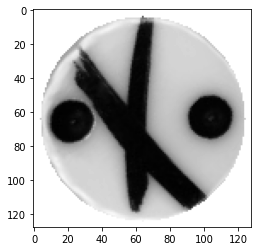

In [18]:
img = Image.open("../../processed_data/train_set/ano/17_11_21_anomalies_016.png")
plt.imshow(img, cmap="gray")

In [19]:
prediction = model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

[[-277.1183   -210.12778  -158.81993   -90.23657  -108.24028    -1.235478]]


In [20]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5]


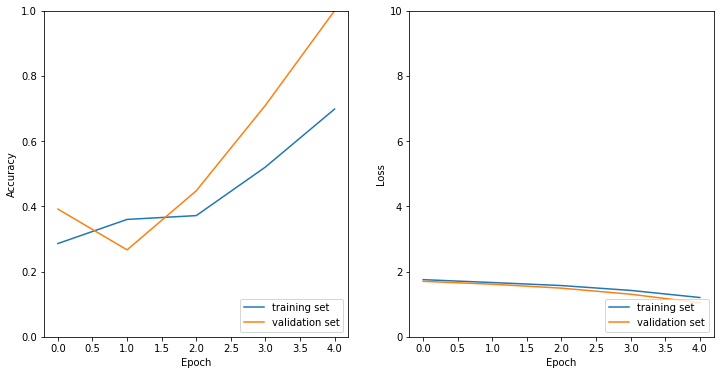

In [21]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred_labels = model.predict(test_data).argmax(axis=1)
print(classification_report(test_labels, pred_labels))
confusion_matrix(test_labels, pred_labels)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       235
           3       0.99      1.00      1.00       188
           4       1.00      0.99      1.00       162
           5       1.00      1.00      1.00       357

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



array([[168,   0,   0,   0,   0,   0],
       [  0, 205,   0,   0,   0,   0],
       [  0,   0, 235,   0,   0,   0],
       [  0,   0,   0, 188,   0,   0],
       [  0,   0,   0,   1, 161,   0],
       [  0,   0,   0,   0,   0, 357]])